## Dataset do Titanic

1. Realizar uma análise exploratória dos dados.

2. Responder à pergunta: "Qual é a probabilidade de sobrevivência de uma mulher?"

3. Implementar a validação do modelo utilizando Cross Validation.

4. Testar os modelos e realizar suas avaliações.

In [1]:
# Import bibliotecas
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importando Dataframes do titanic

In [2]:
# Titanic Da web
#
df_titanic = sns.load_dataset('titanic')
df_titanic.shape

(891, 15)

In [3]:
print(df_titanic.info())
df_titanic.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
# titanic do Kaggle baixado em CSV
#
df_titanic_2 = pd.read_csv('train.csv')
df_titanic_2.shape

(891, 12)

In [5]:
df_titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df_titanic_2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Decidi seguir com o dataset do CSV do Kaggle


Inicio de analise exploratória do df_titanic_2

Validando valores nullos

In [8]:
print(df_titanic_2.info())
df_titanic_2.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


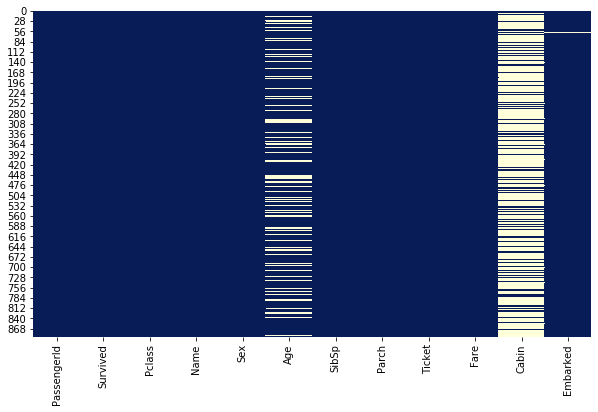

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_titanic_2.isna(),
            cmap="YlGnBu_r",
            cbar_kws={'label': 'Missing Data'},
           cbar=False,
           yticklabels='auto')


Antes de mais nada. A coluna Cabin vai sair

In [10]:
df_titanic_2.drop(['Cabin'], axis=1,inplace=True)

Analisando coluna Idade

In [11]:
# Analisando valores nullo em Idade. E gostaria de saber quanto ele representa em linhas do nosso dataset
#
print(
    ((df_titanic_2.shape[0] - df_titanic_2.Age.isnull().sum()) * 100) / df_titanic_2.shape[0])
# 
#
print("\nIsso demosntra 20% do nosso dataset. Algo que eu não gostaria de simplismente perder, mas não quero atribuir qualquer valor para eles\n Exemplo: simplismente jogar uma moda")

80.13468013468014

Isso demosntra 20% do nosso dataset. Algo que eu não gostaria de simplismente perder, mas não quero atribuir qualquer valor para eles
 Exemplo: simplismente jogar uma moda


> Minha decisão aqui vai ser com relação em volta do sexo. Então ja que gostariamos de descobrir qual a chance de derterminado tipo de sexo sobreviver. Pretendo validar a moda dos dois sexos e atribuir valores a eles.

In [12]:
print("Analise valores nullos\n\nSexo: Mascolino\n",df_titanic_2[df_titanic_2["Sex"] == "male"].isnull().sum(),"\n\nSexo: Feminino\n",df_titanic_2[df_titanic_2["Sex"] == "female"].isnull().sum())

Analise valores nullos

Sexo: Mascolino
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64 

Sexo: Feminino
 PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            53
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
dtype: int64


#### Tratativa dos dados coluna sexo 

In [13]:
df_tita_m, num_idade_m = df_titanic_2[df_titanic_2["Sex"] == "male"], df_titanic_2[df_titanic_2["Sex"] == "male"].Age.mode().tolist()[0]
df_tita_f, num_idade_f = df_titanic_2[df_titanic_2["Sex"] == "female"], df_titanic_2[df_titanic_2["Sex"] == "female"].Age.mode().tolist()[0]

print(type(num_idade_f), type(num_idade_m))

<class 'float'> <class 'float'>


In [14]:
df_tita_m['Age'] = df_tita_m['Age'].fillna(num_idade_m)
df_tita_f['Age'] = df_tita_f['Age'].fillna(num_idade_f)

print(df_tita_f['Age'].isnull().sum())

0


C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_titanic_2 = pd.concat([df_tita_m, df_tita_f])
print(df_titanic_2.shape,"\n",df_titanic_2.isnull().sum())

(891, 11) 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [16]:
str_enbarque_cidade = df_titanic_2.Embarked.mode().tolist()[0]
df_titanic_2['Embarked'] = df_titanic_2['Embarked'].fillna(str_enbarque_cidade)
print("cidade: ",str_enbarque_cidade)

cidade:  S


## Agora com os nullos tratados, vamos olhar como estão os valores em geral

In [17]:
print(df_titanic_2.info())
df_titanic_2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,19.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


### Analisando porcentagem de cada sexo para saber se vai ser enviesado 

In [18]:
# Prcentagem Homem
#
(df_tita_m.shape[0]*100)/df_titanic_2.shape[0] 

64.75869809203142

In [19]:
# Prcentagem Mulher
#
(df_tita_f.shape[0]*100)/df_titanic_2.shape[0]

35.24130190796858

Podemos ver que tem muito mais dados para o sexo mscolino. O que pode comprometer o algoritimo.

Mas antes para responder a pergunta de uma forma rapida sobre o sexo feminino. Vamos vereficar qual a chance de uma mulher sobreviver. Sem aplicar algoritimo.

In [20]:
df_tita_2colunas = df_titanic_2[["Sex","Survived"]]
df_tita_2colunas

,Sex,Survived
0,male,0
4,male,0
5,male,0
6,male,0
7,male,0
...,...,...
880,female,1
882,female,0
885,female,0
887,female,1


Podemos analisar que em geral mulher sobreviveu mais do que homem


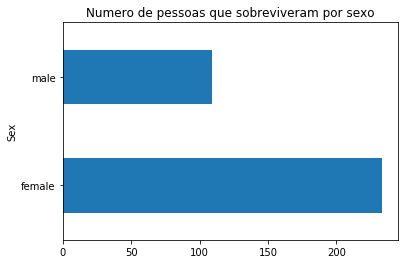

In [21]:
# Somatória de todos os 1 "sobrevieventes"
#
df_groupSum = df_tita_2colunas.groupby(['Sex'])["Survived"].sum()
df_groupSum.plot.barh()
# Add title
plt.title('Numero de pessoas que sobreviveram por sexo');

print("Podemos analisar que em geral mulher sobreviveu mais do que homem")

In [22]:
# Criando dataframe com a contegem de cada sexo
#
df_groupCount = df_tita_2colunas.groupby(['Sex'])["Survived"].count()
#
# Resposta


print("total de sobrevientes femininas entre as mulheres: ",np.round((df_groupSum["female"]*100 )/ df_groupCount["female"],decimals=2),"%")

print("total de sobrevientes femininas: ",np.round((df_groupSum["female"]*100 )/ df_groupCount.sum(),decimals=2),"%")

total de sobrevientes femininas entre as mulheres:  74.2 %
total de sobrevientes femininas:  26.15 %


# Uma vez respondido. Agora vamos entrar com o modelo de ML

Isso é um problema do que afinal?

1. primeiro, temos um valor Y como saida. Então vamos usar modelos *SUPERVISIONADO*
2. Não é série temporal. Então não estamos olhando para problemas e respóstas contendo tempo.
3. A saida não é um valoir continuo, e sim *CATEGÓRICO*. Portanto isso é um problema de *REGRESS LOGÍSTICA*


#### Modelos em mente

> Naive Bayes

> Regressão Logística (Logistic Regression)

> Clustering ou algoritmos de agrupamento - KNN

> Árvore de decisão

> Florestas Aleatórias

> SVM

In [23]:

# Modelos
#
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree

# Separação de treino
#
from sklearn.model_selection import train_test_split

# Normalisação dos dados
#
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Redução de Dimensionalidade
#
from sklearn.decomposition import PCA


# Metricas de resultados
#
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, \
                            f1_score, ConfusionMatrixDisplay





In [24]:
def component_analysis(e, plot='none'):
    varexp = 100* e/e.sum()
    cumvarexp = np.cumsum(varexp)
    # Plotando os autovalores
    if (plot=='eigen'):
        plt.figure(figsize = (4,4))
        plt.plot(e, '-o')
        plt.grid(True)
        plt.xlabel('Componente', fontsize = 15)
        plt.ylabel('Autovalor', fontsize = 15)
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

    # Plotando a explicação da variancia
    if (plot=='varexp'):
        plt.figure(figsize = (4,4))
        plt.plot(cumvarexp, '-o')
        plt.xlabel('Componente', fontsize = 15)
        plt.ylabel('% da variancia explicada', fontsize = 15)
        plt.grid(True)
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

    plt.show()



In [25]:
le_s = LabelEncoder()
le_e = LabelEncoder()

In [26]:
le_s.fit(df_titanic_2.Sex)
df_titanic_2["Sex"] = le_s.transform(df_titanic_2.Sex)
print(le_s.classes_, le_s.transform(le_s.classes_))

['female' 'male'] [0 1]


In [27]:
le_e.fit(df_titanic_2.Embarked)
df_titanic_2["Embarked"] = le_e.transform(df_titanic_2.Embarked)
print(le_e.classes_, le_e.transform(le_e.classes_))

['C' 'Q' 'S'] [0 1 2]


In [28]:
print(df_titanic_2.columns)
df_titanic_2.head(3)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,19.0,0,0,330877,8.4583,1


In [29]:
df_titanic_tratado = df_titanic_2[['Survived', 'Pclass','Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked']]
df_titanic_tratado

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,19.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
...,...,...,...,...,...,...,...,...
880,1,2,0,25.0,0,1,26.0000,2
882,0,3,0,22.0,0,0,10.5167,2
885,0,3,0,39.0,0,5,29.1250,1
887,1,1,0,19.0,0,0,30.0000,2


# Aqui começa a minha pesquisa de modelos aplicaveis

In [30]:


#### Montando opções de dados tabulares
#
#
#


# Separando em matriz valores dependentes e independentes
#
# nosso targuet "y"
Y = df_titanic_tratado['Survived'].values
# nossos valores
x = df_titanic_tratado.drop(['Survived'], axis=1).values


# Variaveis
#
pca = PCA()
sc = StandardScaler()


# Vamos normalizar os dados da tabela
#
X_norm = sc.fit_transform(x)

# Vamos construir opções de dados tabulares com PCA
#
X_pca = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[9.30762461e-01 6.81252209e-02 4.86328019e-04 2.18525511e-04
 1.78131065e-04 1.54541268e-04 7.47921778e-05]


In [31]:
x.shape

(891, 7)

In [32]:
X_norm.shape

(891, 7)

In [33]:
X_pca.shape

(891, 7)

In [34]:
# Essa é a separação feita do PCA referente dos maiores relacionados
#
print(pca.explained_variance_ratio_,"\n\nExemplo dos tres mais siginificativos: ", pca.explained_variance_ratio_[:3])

# A soma tem que dar 100%
#
print("\n\nTotal soma: ",pca.explained_variance_ratio_.sum())

[9.30762461e-01 6.81252209e-02 4.86328019e-04 2.18525511e-04
 1.78131065e-04 1.54541268e-04 7.47921778e-05] 

Exemplo dos tres mais siginificativos:  [9.30762461e-01 6.81252209e-02 4.86328019e-04]


Total soma:  0.9999999999999998


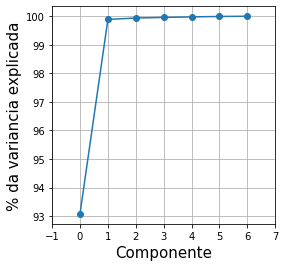

In [35]:
# Aqui é o plot para ver quem da mais. 
#
component_analysis(pca.explained_variance_ratio_, plot="varexp")

In [36]:
# Instânciando e treinando nosso PCA
pca = PCA(3)
pca.fit(x)
print(pca.explained_variance_ratio_)

# Vamos construir opções de dados tabulares com PCA
#
X_pca = pca.fit_transform(x)

[9.30762461e-01 6.81252209e-02 4.86328019e-04]


In [37]:
X_pca

array([[-25.15008928,  -5.01287064,   0.35765547],
       [-23.90196778,   7.96590211,  -0.21881133],
       [-24.04685803,  -8.03412335,  -0.76463422],
       ...,
       [ -2.67920151,  11.17457971,   1.78538957],
       [ -2.50280141,  -8.74711259,  -0.87559684],
       [ -8.88264298,  -3.60070008,   1.23891104]])

In [38]:
### Dividindo em Train Test
#
#

# Padrão
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.15, random_state = 0)
print("Tamanho dos dados: ",len(Y),"\nTamanho de Treino:",y_train.shape,"\nTamanho de Prova: ",y_test.shape )

# pca
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, Y, test_size=0.15, random_state = 0)

# norm
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, Y, test_size=0.15, random_state = 0)

Tamanho dos dados:  891 
Tamanho de Treino: (757,) 
Tamanho de Prova:  (134,)


In [39]:
### Padrão
#
#

# KNN
#
knn = KNeighborsClassifier()
#
knn.fit(X_train, y_train)
#
# Calcular a acurácia do modelo nos dados de teste
X_pred_knn = knn.predict(X_test)
#
print("knn:\n",classification_report(y_test,X_pred_knn))


knn:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        78
           1       0.71      0.61      0.65        56

    accuracy                           0.73       134
   macro avg       0.73      0.71      0.72       134
weighted avg       0.73      0.73      0.73       134



In [40]:
### PCA
#
#

# KNN
#
knn_pca = KNeighborsClassifier()
#
knn_pca.fit(X_pca_train, y_pca_train)
#
# Calcular a acurácia do modelo nos dados de teste
X_pca_pred_knn = knn_pca.predict(X_pca_test)
#
print("knn:\n",classification_report(y_pca_test,X_pca_pred_knn))



# Gaus
#
gnb = GaussianNB()
#
gnb.fit(X_pca_train, y_pca_train)
#
# Calcular a acurácia do modelo nos dados de teste
X_pred_gnb = gnb.predict(X_pca_test)
#
print("\n Gaussian:\n",classification_report(y_pca_test,X_pred_gnb))

knn:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74        78
           1       0.65      0.55      0.60        56

    accuracy                           0.69       134
   macro avg       0.68      0.67      0.67       134
weighted avg       0.68      0.69      0.68       134


 Gaussian:
               precision    recall  f1-score   support

           0       0.64      0.95      0.76        78
           1       0.78      0.25      0.38        56

    accuracy                           0.66       134
   macro avg       0.71      0.60      0.57       134
weighted avg       0.70      0.66      0.60       134



In [41]:
### SC
#
#


# KNN
#
knn_norm = KNeighborsClassifier()
#
knn_norm.fit(X_norm_train, y_norm_train)
#
# Calcular a acurácia do modelo nos dados de teste
X_norm_pred_knn = knn_norm.predict(X_norm_test)
#
print("knn:\n",classification_report(y_norm_test,X_norm_pred_knn))



# Gaus
#
gnb_norm = GaussianNB()
#
gnb_norm.fit(X_norm_train, y_norm_train)
#
# Calcular a acurácia do modelo nos dados de teste
X_norm_pred_gnb = gnb_norm.predict(X_norm_test)
#
print("\n Gaussian:\n",classification_report(y_norm_test,X_norm_pred_gnb))

knn:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        78
           1       0.75      0.70      0.72        56

    accuracy                           0.78       134
   macro avg       0.77      0.76      0.77       134
weighted avg       0.77      0.78      0.77       134


 Gaussian:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75        78
           1       0.66      0.71      0.68        56

    accuracy                           0.72       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.73      0.72      0.73       134



# Como não mudou muitoa coisa. Vamos Começar a vereficar que modelo melhor tem resultado e como chgar no hiperparametro de cada um deles. 

In [42]:
from sklearn.model_selection import cross_val_score

#### SVC model

In [43]:
model_svc = svm.SVC(kernel='linear', C=1, random_state=42)

In [44]:
scores_svc = cross_val_score(model_svc, X_pca, Y, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))

Accuracy: 0.67 (+/- 0.05)


In [45]:
scores_svc = cross_val_score(model_svc, x, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))

Accuracy: 0.78 (+/- 0.37)


In [46]:
scores_svc = cross_val_score(model_svc, X_norm, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))

Accuracy: 0.78 (+/- 0.37)


In [96]:
model_svcPadrao = svm.SVC()

scores_svc = cross_val_score(model_svcPadrao, x, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))


scores_svc = cross_val_score(model_svcPadrao, X_pca, Y, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))

scores_svc = cross_val_score(model_svcPadrao, X_norm, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))

model_svcPadrao.fit(X_norm, Y)

Accuracy: 0.67 (+/- 0.10)
Accuracy: 0.68 (+/- 0.06)
Accuracy: 0.78 (+/- 0.30)


SVC()

##### knn Model

In [48]:
scores_knn = cross_val_score(knn, x, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.69 (+/- 0.11)


In [49]:
scores_knn = cross_val_score(knn, X_pca, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.68 (+/- 0.08)


In [50]:
scores_knn = cross_val_score(knn, X_norm, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.76 (+/- 0.25)


gnb Model

In [51]:
scores_gnb = cross_val_score(gnb, x, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), scores_gnb.std() * 2))

Accuracy: 0.75 (+/- 0.27)


In [52]:
scores_gnb = cross_val_score(gnb, X_pca, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), scores_gnb.std() * 2))

Accuracy: 0.67 (+/- 0.09)


In [53]:
scores_gnb = cross_val_score(gnb, X_norm, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), scores_gnb.std() * 2))

Accuracy: 0.75 (+/- 0.27)


tree Model

In [54]:
model_tree = tree.DecisionTreeClassifier()

In [55]:
scores_tree = cross_val_score(model_tree, x, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

Accuracy: 0.74 (+/- 0.23)


In [56]:
scores_tree = cross_val_score(model_tree, X_pca, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

Accuracy: 0.67 (+/- 0.09)


In [57]:
scores_tree = cross_val_score(model_tree, X_norm, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

Accuracy: 0.74 (+/- 0.24)


LogisticRegression

In [58]:
model_lRegress = LogisticRegression()

In [59]:
scores_lRegress = cross_val_score(model_lRegress, x, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lRegress.mean(), scores_lRegress.std() * 2))

Accuracy: 0.76 (+/- 0.32)


C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
scores_lRegress = cross_val_score(model_lRegress, X_pca, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lRegress.mean(), scores_lRegress.std() * 2))

Accuracy: 0.67 (+/- 0.08)


In [61]:
scores_lRegress = cross_val_score(model_lRegress, X_norm, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lRegress.mean(), scores_lRegress.std() * 2))

Accuracy: 0.76 (+/- 0.32)


O resultado do PCA ja me mostra resultados piores, Pretendo usar a SC e os valores normais.
E gostaria de vlidar em cima dos modelos de melhor resultado.

# Agora vamos criar um modelo monstro, padrão Frankenstein

In [62]:
from sklearn.ensemble import VotingClassifier

In [63]:
# Validação com Voting
voting_classifier = VotingClassifier([("SVC",svm.SVC(kernel='linear', C=1)),
                                     ("gnb", GaussianNB() ),
                                     ("L_Regress",LogisticRegression())])

voting_classifier_Norm = VotingClassifier([("SVC",svm.SVC(kernel='linear', C=1)),
                                          ("KNN",KNeighborsClassifier()),
                                          ("gnb", GaussianNB()),
                                          ("tree", tree.DecisionTreeClassifier()),
                                          ("L_Regress",LogisticRegression())])

In [64]:
# X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.15, random_state = 0)

#X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, Y, test_size=0.15, random_state = 0)


# Treianndo Monstro
#
voting_classifier.fit(X_train,y_train)
#
voting_classifier_Norm.fit(X_norm_train,y_norm_train)


C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('SVC', SVC(C=1, kernel='linear')),
                             ('KNN', KNeighborsClassifier()),
                             ('gnb', GaussianNB()),
                             ('tree', DecisionTreeClassifier()),
                             ('L_Regress', LogisticRegression())])

In [65]:
# Verificando a metrica

y_pred = voting_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62 16]
 [17 39]]
0.753731343283582
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        78
           1       0.71      0.70      0.70        56

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.75      0.75      0.75       134



In [66]:
# Verificando a metrica

y_norm_pred = voting_classifier.predict(X_norm_test)

cm = confusion_matrix(y_norm_test, y_norm_pred)
print(cm)
print(accuracy_score(y_norm_test, y_norm_pred))
print(classification_report(y_norm_test, y_norm_pred))

[[ 2 76]
 [ 0 56]]
0.43283582089552236
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        78
           1       0.42      1.00      0.60        56

    accuracy                           0.43       134
   macro avg       0.71      0.51      0.32       134
weighted avg       0.76      0.43      0.28       134



### Com CorssV

In [107]:
scores_Vt = cross_val_score(voting_classifier, x, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Vt.mean(), scores_Vt.std() * 2))

voting_classifier.fit(x, Y)

C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.77 (+/- 0.33)


VotingClassifier(estimators=[('SVC', SVC(C=1, kernel='linear')),
                             ('gnb', GaussianNB()),
                             ('L_Regress', LogisticRegression())])

In [68]:
scores_Vt_norm = cross_val_score(voting_classifier_Norm, X_norm, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Vt_norm.mean(), scores_Vt_norm.std() * 2))

Accuracy: 0.76 (+/- 0.33)


#### visualização em tabela

In [69]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Voting S_G_LR','Voting Norm S_K_G_T_LR','L_Regress_norm','knn_norm','gnb','tree'],
    'Score': [scores_svc.mean(),scores_Vt.mean(), scores_Vt_norm.mean(), scores_lRegress.mean(),scores_knn.mean(),scores_gnb.mean(),scores_tree.mean()],
'DP': [scores_svc.std() * 2, scores_Vt.std() * 2, scores_Vt_norm.std() * 2, scores_lRegress.std() * 2, scores_knn.std() * 2, scores_gnb.std() * 2,scores_tree.std() * 2]})

models.sort_values(by='Score', ascending=False)

,Model,Score,DP
0,Support Vector Machines,0.782399,0.303191
1,Voting S_G_LR,0.766725,0.334379
2,Voting Norm S_K_G_T_LR,0.762231,0.326377
4,knn_norm,0.758816,0.249070
3,L_Regress_norm,0.756619,0.321062
5,gnb,0.746475,0.273130
6,tree,0.739677,0.237569


### Puxando Base Teste

In [70]:
# titanic do Kaggle baixado em CSV
#
df_titanic_test = pd.read_csv('test.csv')
df_titanic_test.shape

(418, 11)

In [71]:
df_titanic_test.drop(['Ticket','Cabin','Name'], axis=1,inplace=True)

In [72]:
df_titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [73]:
####df_titanic_test.dropna(subset=['Fare'],axis=0, inplace=True)
num_meanFeare = df_titanic_test["Fare"].mean()
df_titanic_test["Fare"] = df_titanic_test["Fare"].fillna(num_meanFeare)

df_titanic_test.shape

(418, 8)

In [74]:
df_titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [75]:
df_titanic_test['Age'] = df_titanic_test['Age'].fillna(np.round(df_titanic_test['Age'].mean(), 0))

In [76]:
df_titanic_tratado.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [77]:
df_titanic_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [79]:
print(df_titanic_test.shape)

(418, 8)


In [82]:
df_titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,30.0,0,0,8.0500,S


In [84]:
##df_tita_test.drop(['PassengerId'], axis=1,inplace=True)
df_titanic_test.set_index(['PassengerId'],inplace=True)
df_titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,30.0,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [85]:
df_titanic_test["Sex"] = le_s.transform(df_titanic_test.Sex)

df_titanic_test["Embarked"] = le_e.transform(df_titanic_test.Embarked)

df_titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
1305,3,1,30.0,0,0,8.0500,2
1306,1,0,39.0,0,0,108.9000,0
1307,3,1,38.5,0,0,7.2500,2


# Mais uma validação de ML

In [87]:
# nosso targuet "y"
###Y_tita = df_tita_test['Survived'].values
# nossos valores
###x_tita = df_tita_test.drop(['Survived'], axis=1).values
x_tita = df_titanic_test.values

# Norm
x_tita_norm = sc.transform(x_tita)

print(x_tita[:6])
print("\nNorm:",x_tita_norm[:6])

[[ 3.      1.     34.5     0.      0.      7.8292  1.    ]
 [ 3.      0.     47.      1.      0.      7.      2.    ]
 [ 2.      1.     62.      0.      0.      9.6875  1.    ]
 [ 3.      1.     27.      0.      0.      8.6625  2.    ]
 [ 3.      0.     22.      1.      1.     12.2875  2.    ]
 [ 3.      1.     14.      0.      0.      9.225   2.    ]]

Norm: [[ 0.82737724  0.73769513  0.48950741 -0.4745452  -0.47367361 -0.49078316
  -0.67817453]
 [ 0.82737724 -1.35557354  1.41256602  0.43279337 -0.47367361 -0.50747884
   0.58595414]
 [-0.36936484  0.73769513  2.52023635 -0.4745452  -0.47367361 -0.45336687
  -0.67817453]
 [ 0.82737724  0.73769513 -0.06432776 -0.4745452  -0.47367361 -0.47400493
   0.58595414]
 [ 0.82737724 -1.35557354 -0.4335512   0.43279337  0.76762988 -0.40101668
   0.58595414]
 [ 0.82737724  0.73769513 -1.02430871 -0.4745452  -0.47367361 -0.46267916
   0.58595414]]


In [103]:
df_titanic_test["Survived"] = 0
df_titanic_RESPOSTA = df_titanic_test[["Survived"]]

# Subiting modeles response

In [105]:
y_tita_pred_model_svcPadrao = model_svcPadrao.predict(x_tita_norm)

print( "Model: ",model_svcPadrao,"\nResponse:", y_tita_pred_model_svcPadrao)

df_titanic_RESPOSTA["Survived"] = y_tita_pred_model_svcPadrao
df_titanic_RESPOSTA.to_csv('y_tita_pred_model_svcPadrao.csv')

Model:  SVC() 
Response: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [109]:
y_tita_pred_voting_classifier = voting_classifier.predict(x_tita)


print( "Model: ",voting_classifier,"\nResponse:", y_tita_pred_voting_classifier)

df_titanic_RESPOSTA["Survived"] = y_tita_pred_voting_classifier
df_titanic_RESPOSTA.to_csv('y_tita_pred_voting_classifier.csv')

Model:  VotingClassifier(estimators=[('SVC', SVC(C=1, kernel='linear')),
                             ('gnb', GaussianNB()),
                             ('L_Regress', LogisticRegression())]) 
Response: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 

C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
